In [108]:
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
car_df=pd.read_csv('car_prices.csv')
car_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [109]:
car_df.drop('vin',axis=1,inplace=True)

In [110]:
car_df.nunique()

year                34
make                96
model              973
trim              1963
body                87
transmission         4
state               64
condition           41
odometer        172278
color               46
interior            17
seller           14263
mmr               1101
sellingprice      1887
saledate          3766
dtype: int64

In [111]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   state         558837 non-null  object 
 7   condition     547017 non-null  float64
 8   odometer      558743 non-null  float64
 9   color         558088 non-null  object 
 10  interior      558088 non-null  object 
 11  seller        558837 non-null  object 
 12  mmr           558799 non-null  float64
 13  sellingprice  558825 non-null  float64
 14  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(10)
memory usage: 64.0+ MB


In [112]:
data=car_df.groupby(car_df['color'])[['color','sellingprice']].mean('sellinprice')

In [113]:
car_df['condition'].nunique()

41

<Axes: xlabel='sellingprice', ylabel='Count'>

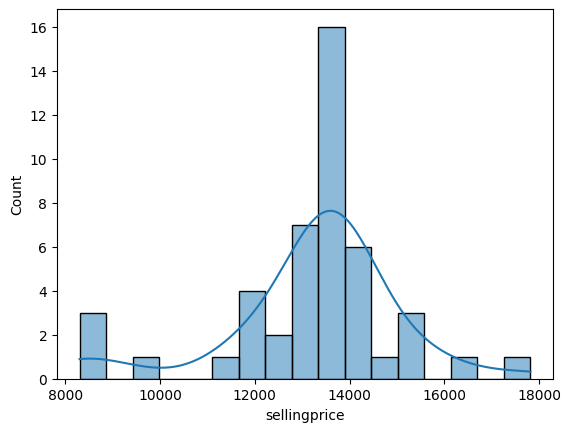

In [114]:
sns.histplot(data['sellingprice'],kde=True)

In [115]:
data=car_df.groupby('condition')['sellingprice'].mean()

<Axes: xlabel='condition'>

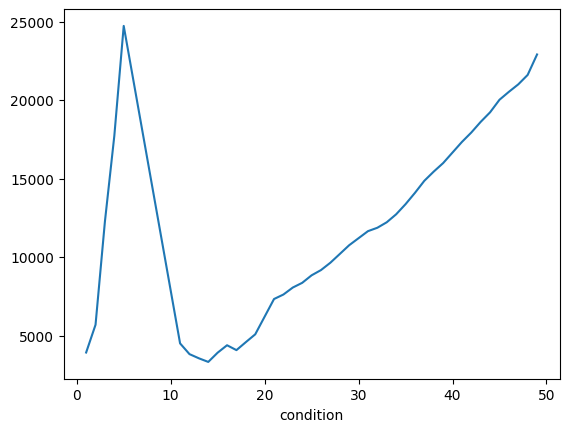

In [116]:
sns.lineplot(x=data.index,y=data.values)

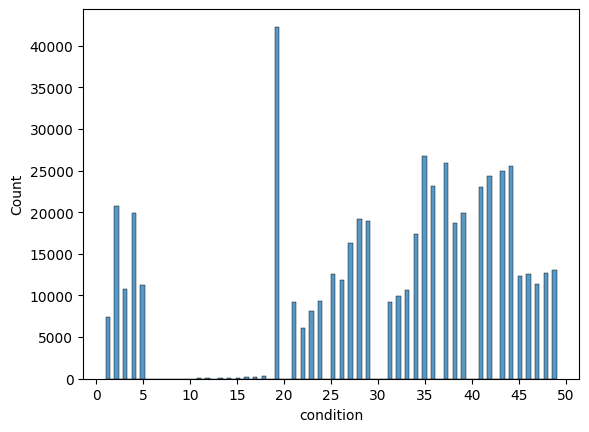

In [120]:
ax=sns.histplot(car_df['condition'])
ax.xaxis.set_major_locator(plt.MultipleLocator(5))

([<matplotlib.axis.XTick at 0x2151fb24ec0>,
 [Text(0, 0, 'Acura'),
  Text(1, 0, 'Aston Martin'),
  Text(2, 0, 'Audi'),
  Text(3, 0, 'BMW'),
  Text(4, 0, 'Bentley'),
  Text(5, 0, 'Buick'),
  Text(6, 0, 'Cadillac'),
  Text(7, 0, 'Chevrolet'),
  Text(8, 0, 'Chrysler'),
  Text(9, 0, 'Daewoo'),
  Text(10, 0, 'Dodge'),
  Text(11, 0, 'FIAT'),
  Text(12, 0, 'Ferrari'),
  Text(13, 0, 'Fisker'),
  Text(14, 0, 'Ford'),
  Text(15, 0, 'GMC'),
  Text(16, 0, 'Geo'),
  Text(17, 0, 'HUMMER'),
  Text(18, 0, 'Honda'),
  Text(19, 0, 'Hyundai'),
  Text(20, 0, 'Infiniti'),
  Text(21, 0, 'Isuzu'),
  Text(22, 0, 'Jaguar'),
  Text(23, 0, 'Jeep'),
  Text(24, 0, 'Kia'),
  Text(25, 0, 'Lamborghini'),
  Text(26, 0, 'Land Rover'),
  Text(27, 0, 'Lexus'),
  Text(28, 0, 'Lincoln'),
  Text(29, 0, 'Lotus'),
  Text(30, 0, 'MINI'),
  Text(31, 0, 'Maserati'),
  Text(32, 0, 'Mazda'),
  Text(33, 0, 'Mercedes-Benz'),
  Text(34, 0, 'Mercury'),
  Text(35, 0, 'Mitsubishi'),
  Text(36, 0, 'Nissan'),
  Text(37, 0, 'Oldsmobile'),


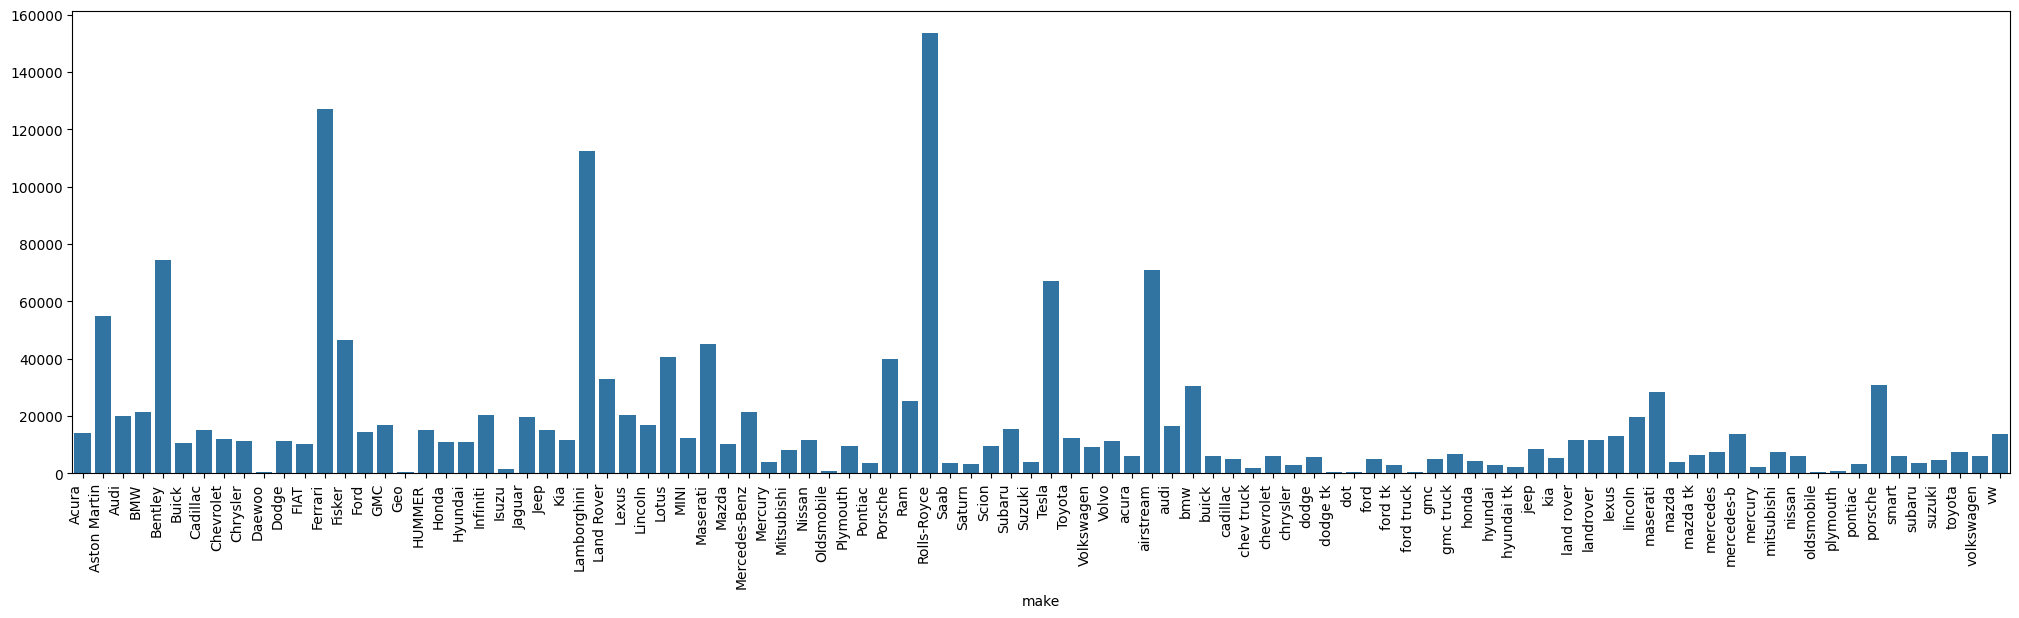

In [118]:

car_value=car_df.groupby('make')['sellingprice'].mean()
plt.figure(figsize=(25,6))
sns.barplot(x=car_value.index,y=car_value.values)
xtick_positions = plt.xticks()[0]  # Get current tick positions

# Set new tick positions and rotated labels (adjust rotation as needed)
plt.xticks(xtick_positions, car_value.index, rotation=90, ha='right')

In [119]:
low_quality=car_df[car_df['condition']<10]

low_quality


,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,ca,3.0,4809.0,red,black,d/m auto sales inc,26300.0,17500.0,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558811,2013,Hyundai,Sonata,GLS,Sedan,NaN,nj,2.0,44084.0,silver,gray,enterprise veh exchange/rental,11000.0,10800.0,Tue Jul 07 2015 09:00:00 GMT-0700 (PDT)
558816,2013,Mercedes-Benz,G-Class,G63 AMG,suv,automatic,fl,5.0,26799.0,black,black,fields bmw,104000.0,105000.0,Tue Jul 07 2015 06:00:00 GMT-0700 (PDT)
558824,2013,Audi,S5,Premium Plus quattro,convertible,automatic,fl,5.0,20158.0,silver,black,prestige audi,43900.0,42000.0,Thu Jul 09 2015 06:00:00 GMT-0700 (PDT)
558829,2012,Hyundai,Elantra,Limited,Sedan,NaN,pa,4.0,66720.0,gray,gray,champion mazda,10250.0,10400.0,Wed Jul 08 2015 07:30:00 GMT-0700 (PDT)
